In [1]:
import networkx as nx
import EoN
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")
from glob import glob
from Functions import *
%run -i "Functions.py"
import matplotlib as mpl
# Axes
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
# ticks
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
# grid
mpl.rcParams['grid.color'] = 'gray'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['grid.linewidth'] = 0.5
# legend
mpl.rcParams['legend.fontsize'] = 14
# figure
mpl.rcParams['figure.figsize'] = (5,5)
mpl.rcParams['figure.autolayout'] = True

In [2]:
female, male, time = np.loadtxt("network_rocha-etal.csv", unpack=True, comments="#", dtype=np.int16)
tot_nodes = len(np.unique(female)) + len(np.unique(male))
edges = np.stack((female, male), axis=-1)
aggregated_network = nx.from_edgelist(edges)
remove = [node for node, degree in dict(aggregated_network.degree()).items() if degree < 5]
aggregated_network.remove_nodes_from(remove)

number_of_nodes = aggregated_network.number_of_nodes()
print(number_of_nodes)

3902


##### Simulations/SIR_temporal_16482.npz #####


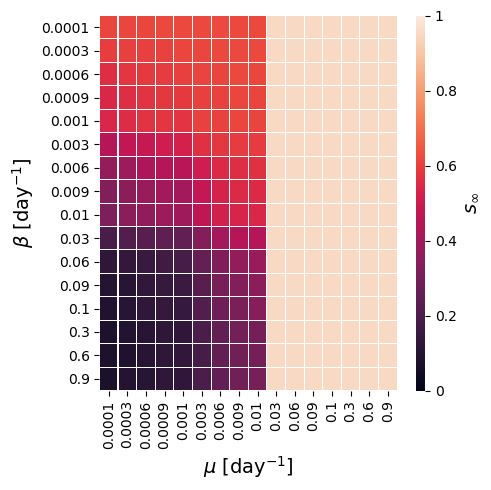

In [3]:
# static network
fname = glob("Simulations/SIR_temporal_?????.npz")[0]
data = np.load(fname, allow_pickle=True)
beta_SIR = data["beta"]
mu_SIR   = data["mu"]
time_SIR = data["time"] 
S_SIR    = data["S"] 
I_SIR    = data["I"] 
R_SIR    = data["R"]
name = fname.split("/")[-1]
#outname = "Figure/Simulations/{}.pdf".format(name.split(".")[0])
print("##### {} #####".format(fname))
beta_mu_heatmap(beta_SIR, mu_SIR, S_SIR, tot_nodes)
data.close()

##### Simulations/SIR_temporal_53706_rm5.npz #####


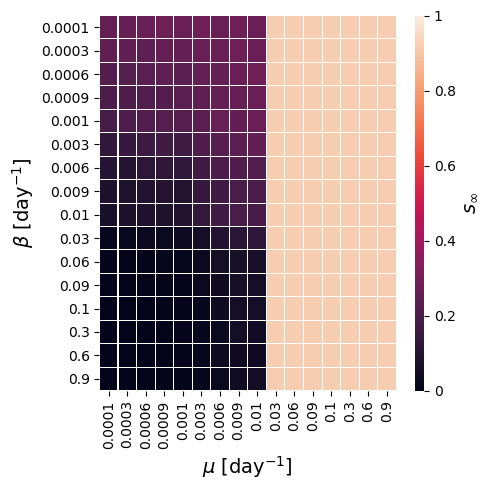

In [4]:
# reduced network
fname = glob("Simulations/SIR_temporal_?????_rm5.npz")[0]
data = np.load(fname, allow_pickle=True)
beta_rm = data["beta"]
mu_rm   = data["mu"]
time_rm = data["time"] 
S_rm    = data["S"] 
I_rm    = data["I"] 
R_rm    = data["R"]
name = fname.split("/")[-1]
outname = "Figure/Simulations/{}.pdf".format(name.split(".")[0])
print("##### {} #####".format(fname))
beta_mu_heatmap(beta_rm, mu_rm, S_rm, number_of_nodes, fname=outname)
data.close()

##### Simulations/SIR_temporal_53706_rm5.npz #####


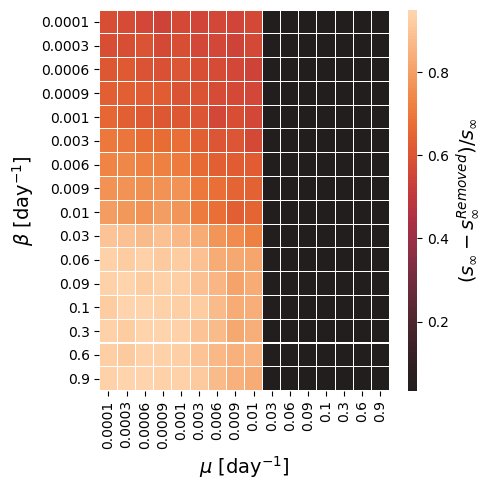

In [5]:
# diff
S_diff = [[(el_sir[-1]/tot_nodes - el_rm[-1]/number_of_nodes)/(el_sir[-1]/tot_nodes)] for el_sir, el_rm in zip(S_SIR, S_rm)]
outname = "Figure/Simulations/{}_diff.pdf".format(name.split(".")[0])
print("##### {} #####".format(fname))
beta_mu_heatmap(beta_SIR, mu_SIR, S_diff, 1, fname=outname, comparison=True)
data.close()

##### Simulations/SIS_temporal_72633.npz #####


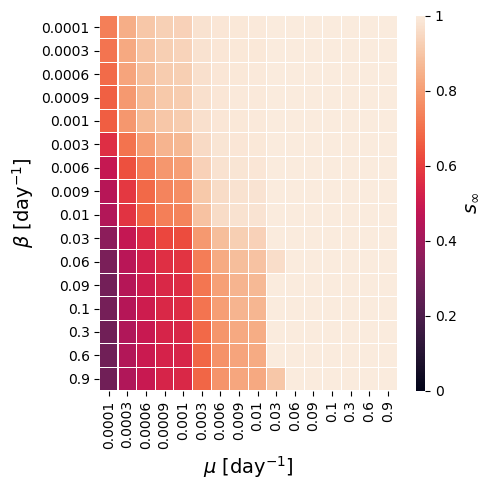

In [6]:
# static network
fname = glob("Simulations/SIS_temporal_?????.npz")[0]
data = np.load(fname, allow_pickle=True)
beta_SIS = data["beta"]
mu_SIS   = data["mu"]
time_SIS = data["time"] 
S_SIS    = data["S"] 
I_SIS    = data["I"] 
name = fname.split("/")[-1]
#outname = "Figure/Simulations/{}.pdf".format(name.split(".")[0])
print("##### {} #####".format(fname))
beta_mu_heatmap(beta_SIS, mu_SIS, S_SIS, tot_nodes)
data.close()

##### Simulations/SIS_temporal_30330_rm5.npz #####


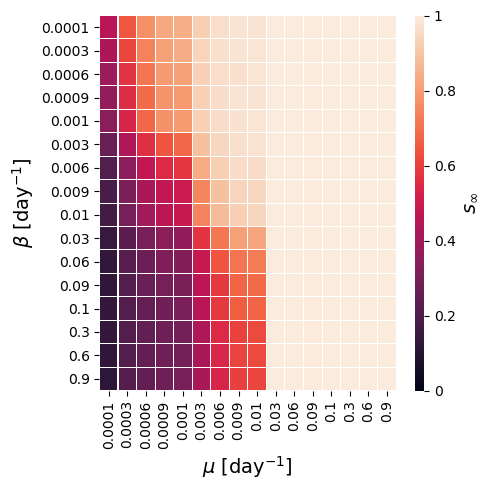

In [7]:
# reduced network
fname = glob("Simulations/SIS_temporal_?????_rm5.npz")[0]
data = np.load(fname, allow_pickle=True)
beta_rm = data["beta"]
mu_rm   = data["mu"]
time_rm = data["time"] 
S_rm    = data["S"] 
I_rm    = data["I"] 
name = fname.split("/")[-1]
outname = "Figure/Simulations/{}.pdf".format(name.split(".")[0])
print("##### {} #####".format(fname))
beta_mu_heatmap(beta_rm, mu_rm, S_rm, number_of_nodes, fname=outname)
data.close()

##### Simulations/SIS_temporal_30330_rm5.npz #####


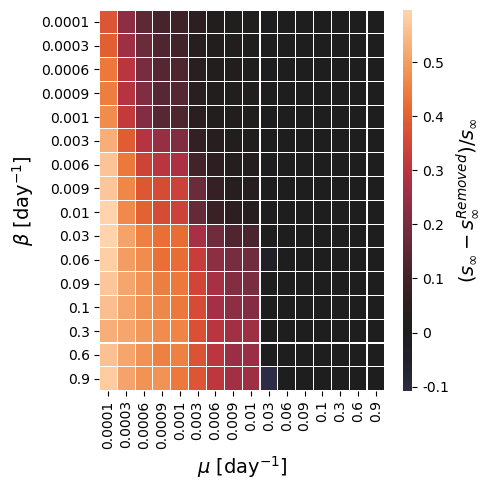

In [8]:
# diff
S_diff = [[(el_sis[-1]/tot_nodes - el_rm[-1]/number_of_nodes)/(el_sis[-1]/tot_nodes)] for el_sis, el_rm in zip(S_SIS, S_rm)]
outname = "Figure/Simulations/{}_diff.pdf".format(name.split(".")[0])
print("##### {} #####".format(fname))
beta_mu_heatmap(beta_SIS, mu_SIS, S_diff, 1, fname=outname, comparison=True)
data.close()